In [2]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import fcluster,dendrogram,linkage
import os

In [3]:
with open ('rmsd_result.txt') as f:
    rmsd = f.readlines()
with open ('cluster_4.csv') as f:
    cluster = f.read()
cluster = cluster.split(' ')
cluster = cluster[:-1]
with open('../error_list/true_cavity_result_list.txt', 'r') as f:
    text = f.read()
pdb_ids = text.split(',')


In [4]:
mat = np.zeros((len(rmsd), len(rmsd)))
dist_map = []
for i in rmsd:
    odometry = i.split(',')
    for j in odometry:
        mat[rmsd.index(i)][odometry.index(j)] = j
        dist_map.append(j)

In [5]:
mat_2 = np.zeros((len(cluster), len(cluster)))
for i in range(len(cluster)):
    x = pdb_ids.index(cluster[i])
    for j in range(len(cluster)):
        y = pdb_ids.index(cluster[j])
        mat_2[i][j] = mat[x][y]

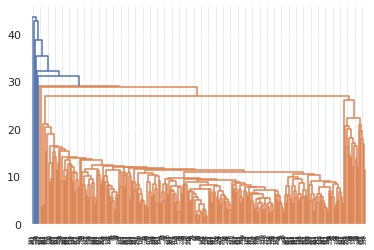

In [6]:
Z = sch.linkage(mat_2, method = 'average')
np.savetxt("Hierachica_clustering_result_cluster_4.txt", Z, fmt = '%f', delimiter = ' ')
P = sch.dendrogram(Z)


In [7]:
f = fcluster(Z, t=20, criterion='distance')
f

array([ 5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5, 15,  5,  5,  5,  5,  5,  8,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5, 16,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5, 10,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  8,  5,  5,  5,  8,  5,  8,
        9,  5,  5,  8,  5,  8,  5,  8,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  1,  5,  6,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5, 10,  5,  5,  5,  5,  5,  5,
        5,  5,  5, 17,  5,  5,  5,  5,  5,  5,  5,  3,  3,  5,  5,  5,  8,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  8,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5, 11

In [8]:
cluster_1=[]
cluster_2=[]
cluster_3=[]
cluster_3clpro=[]
for i in range(len(f)):
    if f[i]==5:
        cluster_3clpro.append(cluster[i])
    elif  f[i]==8:
        cluster_1.append(cluster[i])
    elif  f[i]==9:
        cluster_2.append(cluster[i])
    elif  f[i]==10:
        cluster_3.append(cluster[i])
    else:
        pass

In [9]:
# 8,10(6w81,non-covalent),5,9,18(complex Z285.....可能不是inhibitor)

In [10]:
mat_3 = np.zeros((len(cluster_3clpro), len(cluster_3clpro)))
for i in range(len(cluster_3clpro)):
    x = cluster.index(cluster_3clpro[i])
    for j in range(len(cluster_3clpro)):
        y = cluster.index(cluster_3clpro[j])
        mat_3[i][j] = mat_2[x][y]

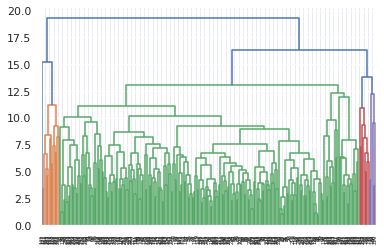

In [11]:
Z_2 = sch.linkage(mat_3,method='complete')
P_2 = sch.dendrogram(Z_2)

In [12]:
f_2 = fcluster(Z_2, t=15, criterion='distance')
f_2

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3,
       4, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 1, 3, 3, 3, 4, 3, 3, 3, 2, 1, 3, 3, 3, 4, 3, 3, 3,
       3, 1, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3,
       4, 3, 1, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 4, 3, 3, 1, 1, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 1, 3], dtype=int32)

In [39]:
cluster_4=[]
cluster_5=[]
cluster_6=[]
cluster_7=[]
for i in range(len(f_2)):
    if  f_2[i]==1:
        cluster_4.append(cluster_3clpro[i])
    elif  f_2[i]==2:
        cluster_5.append(cluster_3clpro[i])
    elif  f_2[i]==3:
        cluster_6.append(cluster_3clpro[i])
    elif  f_2[i]==4:
        cluster_7.append(cluster_3clpro[i])
    else:
        pass

In [40]:
print(cluster_1)
print(cluster_2)
print(cluster_3)
print(cluster_4)
print(cluster_5)
print(cluster_6)
print(cluster_7)                            

['7T4A', '7RVT', '7RVZ', '7RW1', '7S70', '7S72', '7S74', '7DPU', '7C8R']
['7S6X']
['6W81', '2AMP', '6L70', '5NH0', '6FV1']
['8ACL', '7DPP', '7LMD', '7VTH', '7L8I', '7END', '7S4B', '7L10', '5RH2', '5RH3', '7TVS', '7DDC', '5N19']
['7ENE']
['7T3Y', '7T3Z', '7T41', '7LZU', '7LZY', '7LZZ', '7M00', '7M01', '7M03', '7TIU', '7TIV', '7TIW', '7TIX', '6M2N', '7LZV', '7VVT', '7TIA', '7TIY', '7TIZ', '7E18', '7E19', '7TJ0', '7T43', '7T44', '7T45', '7T46', '7T4B', '7TQ8', '8CZT', '8CZU', '8CZV', '6VGY', '6VGZ', '6VH0', '6VH1', '6VH3', '7LZW', '7TQ2', '7TQ4', '7TQ6', '8CZW', '8DGY', '7JKV', '6XMK', '6W2A', '7LKS', '7LKX', '7LKR', '7LKT', '7LKV', '7LTN', '7LTJ', '7YGQ', '7EO8', '7LYH', '7RFR', '7RFS', '7RFU', '7RFW', '8E63', '7KX5', '7XRY', '8E64', '8E65', '8E68', '8E69', '8F44', '7CA8', '7RVM', '7RVO', '7RVP', '7RVR', '7RVU', '7RVW', '7RVY', '7RW0', '7S6Y', '7S6Z', '7S71', '7S73', '7S75', '8DD1', '7TE0', '7TOB', '7MAW', '7MB0', '7MB2', '7MB3', '8DPR', '8F45', '7MAV', '8D4K', '8D4M', '8DD9', '8DGB', '8

In [41]:
# 1:7l10,7end,7s4b(non-covalent)
# 2:7ene(non-covalent)
# 3:7l11,7l12......7l0d,7tvx,(non-covalent)
# 

In [57]:
def cluster_chara (mat_i=mat_2,cluster_tot=cluster,cluster_i=cluster_1):
    mat_chara = np.zeros((len(cluster_i), len(cluster_i)))
    for i in cluster_i:
        x = cluster_tot.index(i)
        for j in cluster_i:
            y = cluster_tot.index(j)
            mat_chara[cluster_i.index(i)][cluster_i.index(j)] = mat_i[x][y]
    np.sum(mat_chara,axis=1)
    print(np.sum(mat_chara,axis=1))
    # a = np.sum(mat_chara,axis=1).tolist().index(min(np.sum(mat_chara,axis=1)))
    # print(cluster_i[a])

In [51]:
cluster_chara(mat_2,cluster,cluster_1)
cluster_chara(mat_2,cluster,cluster_2)
cluster_chara(mat_2,cluster,cluster_3)
cluster_chara(mat_3,cluster_3clpro,cluster_4)
cluster_chara(mat_3,cluster_3clpro,cluster_5)
cluster_chara(mat_3,cluster_3clpro,cluster_6)
cluster_chara(mat_3,cluster_3clpro,cluster_7)



7RVT
7S6X
6W81
7L10
7ENE
8E69
7ZQW


In [55]:
cluster.index('7ENE')
mat_2[160]

array([1.07918 , 1.021779, 1.243662, 1.274612, 1.128036, 1.744098,
       1.053618, 2.182773, 1.982696, 1.231206, 1.141142, 1.210998,
       1.222244, 1.144467, 1.860323, 3.81438 , 3.701422, 1.177202,
       0.945408, 1.315696, 1.167727, 1.247701, 1.804544, 0.51184 ,
       1.174928, 1.958139, 1.890426, 1.90809 , 2.111003, 3.496877,
       4.961619, 1.467186, 1.10346 , 1.283346, 1.297477, 1.179776,
       1.071572, 1.075891, 1.01489 , 1.027871, 2.10318 , 1.870481,
       0.802719, 2.094375, 1.926298, 3.398057, 1.100998, 2.161707,
       4.99477 , 2.078695, 2.02581 , 1.857664, 1.826176, 1.314036,
       1.846368, 1.39193 , 1.133324, 2.293313, 2.818757, 1.082007,
       1.163387, 1.905432, 1.819879, 1.105261, 1.342131, 1.293239,
       1.610165, 1.092488, 4.700645, 1.022788, 2.490464, 1.215499,
       1.928748, 1.298325, 4.18802 , 1.321513, 2.094429, 1.063031,
       2.007703, 1.526034, 1.676798, 3.588295, 2.897462, 1.176546,
       3.253563, 2.905046, 1.858581, 1.852446, 2.110951, 1.541

In [58]:
cluster_chara(mat_3,cluster_3clpro,cluster_7)

[16.934462 16.180412 15.657631 18.526307 16.422682 18.905748 18.672353
 18.120921 14.654501 17.749146 16.948367 15.20154  16.29551 ]
